In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/DataScience/Limpieza de datos/Clases/Clase 1 - Limpieza datos/datasets/IMDB.csv', sep=';')

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 86 non-null     object 
 1   director_name         86 non-null     object 
 2   duration              97 non-null     int64  
 3   gross                 89 non-null     float64
 4   genres                96 non-null     object 
 5   movie_title           97 non-null     object 
 6   title_year            97 non-null     int64  
 7   language              97 non-null     object 
 8   country               97 non-null     object 
 9   budget                93 non-null     float64
 10  imdb_score            97 non-null     float64
 11  actors                97 non-null     object 
 12  movie_facebook_likes  97 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [ ]:
#objetivo del dataset- predecir el imdb score de una nueva pelicula.
#en base a los datos que tenemos.

In [ ]:
imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
imdb.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,97.000000,8.900000e+01,97.000000,9.300000e+01,97.000000,97.000000
mean,155.515464,1.539379e+08,1975.690722,1.049830e+08,6.871134,65273.453608
std,73.550452,1.412026e+08,258.477165,7.784829e+07,1.939231,58018.198425
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.000000,4.710508e+07,2012.000000,4.000000e+07,6.500000,24000.000000
50%,143.000000,1.156040e+08,2013.000000,7.800000e+07,7.200000,54000.000000
75%,154.000000,2.410639e+08,2014.000000,1.780000e+08,7.800000,85000.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


In [ ]:
imdb.tail()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000
96,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [ ]:
#siguiente paso-ver los duplicados(que en toda la fila haya los mismos datos).
imdb.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Length: 97, dtype: bool

In [ ]:
#para que nos detalle los duplicados. ej-la fila 9 es igual en otra fila.
imdb[imdb.duplicated()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
61,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0


In [ ]:
#para ver con quien esta duplicada
imdb[imdb.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
19,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
28,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
50,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
52,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


In [ ]:
#muestra las filas que tienen un duplicado.
len(imdb[imdb.duplicated()])

6

In [ ]:
#ahora tendo que borrarlas, IMP antes hacer copias.
imdb2=imdb.copy()

In [ ]:
#al no dar parametro, elimina los duplicados
imdb2.drop_duplicates(inplace=True)

In [ ]:
len(imdb2)

91

In [ ]:
#ahora hay que ver los nulos.
imdb2.isnull()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,False,False,False,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,True,False,False,False
94,False,False,False,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#ahora para contar los nulos por columnas.
imdb2.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [ ]:
#vamos a empezar a analizar por color
imdb2['color'].value_counts()

Color               78
color                1
 Black and White     1
Name: color, dtype: int64

In [ ]:
#para columna color, vamos a eliminar. mas abajo.

In [ ]:
#para ver de nuevo el nombre de las columnas.
imdb2.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [ ]:
#seguimos con otra variable
imdb2['director_name'].value_counts()

Michael Bay          3
Peter Jackson        3
Christopher Nolan    3
Ridley Scott         3
Martin Scorsese      2
                    ..
Shane Black          1
Adam McKay           1
Zack Snyder          1
Baz Luhrmann         1
Clint Eastwood       1
Name: director_name, Length: 61, dtype: int64

In [ ]:
#para ver si la fila de los nulos tiene valor, en el resto de columnas.
imdb2[imdb2['director_name'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
23,Color,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
30,Color,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
39,Color,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
54,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,Color,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
69,Color,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
73,Color,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
80,Color,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
82,Color,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [ ]:
#en este caso, asignaremos a los nulos 'SIN DIRECTOR'. mas abajo.

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

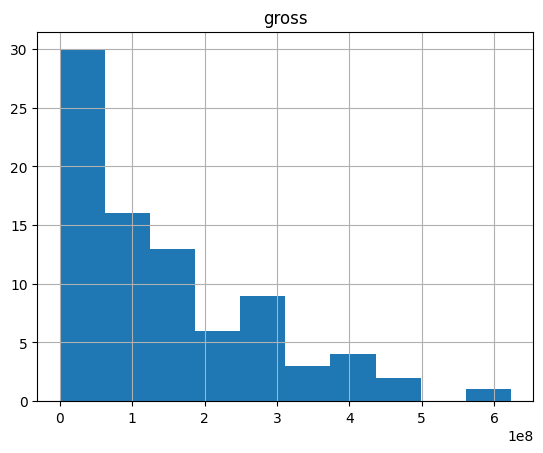

In [ ]:
#cuando es numerico, el value_counts no es muy util, mejor histograma.
imdb2.hist('gross')

In [ ]:
5e8

500000000.0

In [ ]:
#para conocer la que está aislada.Si no ponemos doble corchete,nos da true y false.
imdb2[imdb2['gross']>5e8]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


In [ ]:
#poner 3 condicionales. entre 100 y 140 minutos y pelicula en 2013.
imdb2[(imdb2['duration']>=100) &
(imdb2['duration']<=140) &
(imdb2['title_year']==2013)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
73,Color,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
77,Color,Ridley Scott,138,16969390.0,Crime|Drama|Thriller,The Counselor,2013,English,USA,25000000.0,5.3,"Michael Fassbender,Brad Pitt,Goran Visnjic",24000
78,NaN,James Mangold,138,132550960.0,Action|Adventure|Sci-Fi|Thriller,The Wolverine,2013,English,USA,120000000.0,6.7,"Hugh Jackman,Tao Okamoto,Rila Fukushima",68000
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000


In [ ]:
#poner 3 condicionales con O. entre 100 y 140 minutos o pelicula en 2013.
#predomina el o -- pues los & entre parentesis
imdb2[((imdb2['duration']>=100) &
(imdb2['duration']<=140)) |
(imdb2['title_year']==2013)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
25,Color,Denis Villeneuve,153,60962878.0,Crime|Drama|Mystery|Thriller,Prisoners,2013,English,USA,46000000.0,8.1,"Hugh Jackman,Jake Gyllenhaal,Dylan Minnette",86000
32,Color,Gore Verbinski,650,89289910.0,Action|Adventure|Western,The Lone Ranger,2013,English,USA,215000000.0,6.5,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000
35,Color,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
42,Color,Francis Lawrence,146,424645577.0,Adventure|Sci-Fi|Thriller,The Hunger Games: Catching Fire,2013,English,USA,130000000.0,7.6,"Jennifer Lawrence,Josh Hutcherson,Sandra Ellis...",82000
45,Color,Guillaume Canet,144,41229.0,Crime|Drama|Thriller,Blood Ties,2013,English,France,25500000.0,6.5,"Mila Kunis,Lili Taylor,Billy Crudup",0
48,Color,Adam McKay,143,2175312.0,Comedy,Anchorman 2: The Legend Continues,2013,English,USA,50000000.0,6.3,"Harrison Ford,Will Ferrell,Steve Carell",41000
49,Color,Zack Snyder,143,291021565.0,Action|Adventure|Fantasy|Sci-Fi,Man of Steel,2013,English,USA,225000000.0,7.2,"Henry Cavill,Christopher Meloni,Harry Lennix",118000


In [ ]:
#columnas nulas de gross a ver si el resto de los datos son relevantes.
imdb2[imdb2['gross'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Color,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
35,Color,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
54,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
59,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
60,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
90,Color,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,English,Kyrgyzstan,1400000.0,8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


In [ ]:
#para los nulos de 'gross' pondremos una media. mas abajo.

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

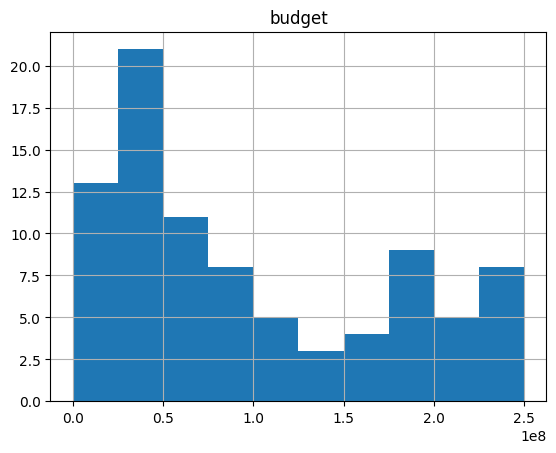

In [ ]:
#ahora con budget tambien histograma. hay mas info en los valores menores.
imdb2.hist('budget')

In [ ]:
imdb2[imdb2['budget'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Color,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Color,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
31,Color,Mike Leigh,150,3958500.0,Biography|Drama|History,Mr. Turner,2014,English,UK,NaN,6.8,"Lesley Manville,Ruth Sheen,Karl Johnson",0
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0


In [ ]:
#para el budget cogeremos la mediana para los nulos. mas abajo.

In [ ]:
imdb2['genres'].value_counts()

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                       

In [ ]:
#hay un solo nulo, pero vamos a tratarlo tambien.
imdb2[imdb2['genres'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
11,Color,Christopher Spencer,170,59696176.0,NaN,Son of God,2014,English,USA,22000000.0,5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000


In [ ]:
#para el genero que es nulo, vamos a poner 'SIN GENERO'. mas abajo.

In [ ]:
#voy a limpiar datos, asi que hago otra copia
imdb3=imdb2.copy()

In [ ]:
#empezamos por borrar el color.
del(imdb3['color'])

In [ ]:
#asignaremos a los nulos 'SIN DIRECTOR'
imdb3['director_name'].fillna('SIN DIRECTOR', inplace=True)

In [ ]:
#ya no hay nulos en director
imdb3.isnull().sum()

director_name           0
duration                0
gross                   7
genres                  1
movie_title             0
title_year              0
language                0
country                 0
budget                  4
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

In [ ]:
media_gross=imdb3['gross'].mean()

In [ ]:
#pongo la media en 'gross'
imdb3['gross'].fillna(media_gross, inplace=True)

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

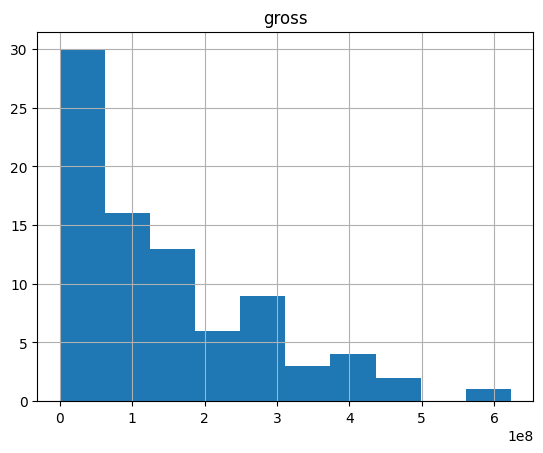

In [ ]:
#comparamos los 2 histogramas para comprobar que son parecidos,
#y que ha sido buena idea la media.
imdb2.hist('gross')

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

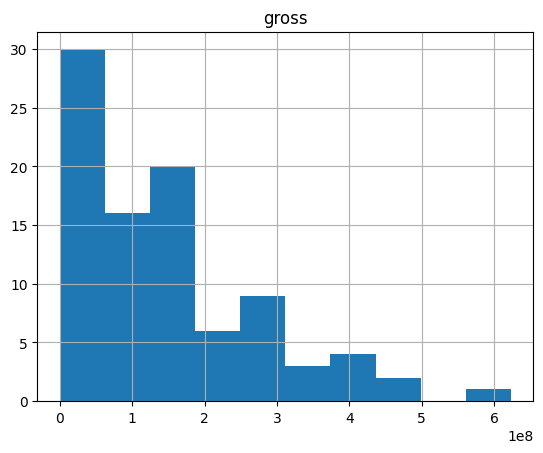

In [ ]:
imdb3.hist('gross')

In [ ]:
#hacer la media de las peliculas en 2013
imdb3[imdb3['title_year']==2013]['gross'].mean()

142157870.6827731

In [ ]:
#mediana de 'budget' para los nulos
mediana_budget=imdb3['budget'].median

In [ ]:
imdb3['budget'].fillna(mediana_budget,inplace=True)

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

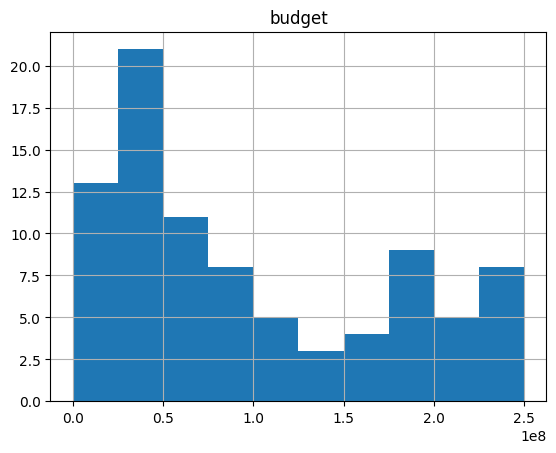

In [ ]:
#comprobar el cambio en los histogramas
imdb2.hist('budget')

In [ ]:
imdb3.hist('budget')

In [ ]:
#rellenamos genero con 'SIN GENERO'
imdb3['genres'].fillna('SIN GENERO', inplace=True)

In [ ]:
#comprobamos si no hay nulos. no quiere decir que no haya validos.
imdb3.isnull().sum()

In [ ]:
imdb4=imdb3.copy()

In [ ]:
#analizamos la duracion.
imdb4.hist('duration')

In [ ]:
#hay que hacer la media de los valores pero sin considerar los extremos.
(imdb4['duration']>50) & (imdb4['duration']<200)

In [ ]:
#entre llaves para ver el resultado.
media_duracion = imdb4[(imdb4['duration']>50) & (imdb4['duration']<200)]['duration'].mean()

In [ ]:
imdb4['duration'].mean()

155.7912087912088

In [ ]:
#reemplazar la duracion con condicion (aquellos que duren...)
imdb4['duration'] = np.where(imdb4['duration']<=50,
                             media_duracion
                             imdb4['duration']  )

SyntaxError: ignored

In [ ]:
imdb4['duration'] = np.where(imdb4['duration']>=200,
                             media_duracion,
                             imdb4['duration']  )

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

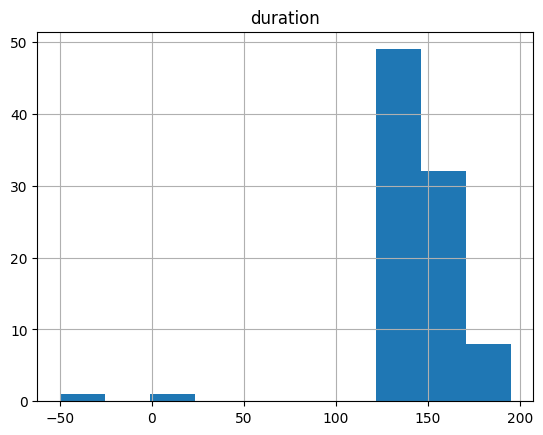

In [ ]:
#comprobamos con histograma
imdb4.hist('duration')

In [ ]:
#continuar con el resto de columnas
imdb4.isnull().sum()

director_name           0
duration                0
gross                   0
genres                  0
movie_title             0
title_year              0
language                0
country                 0
budget                  0
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

In [ ]:
#empiezo los ejercicios en casa.
#vamos con movie_title
imdb2['movie_title'].value_counts()

Ben-Hur                    2
Unbroken                   2
The Wolf of Wall Street    1
The Judge                  1
Get on Up                  1
                          ..
Mr. Turner                 1
Lincoln                    1
Exodus: Gods and Kings     1
The Amazing Spider-Man     1
Jersey Boys                1
Name: movie_title, Length: 89, dtype: int64

In [ ]:
#language
imdb4['language'].value_counts()

English    91
Name: language, dtype: int64

In [ ]:
len(imdb4[(imdb4['language']!='English')])

0

In [ ]:
del (imdb4['language'])

In [ ]:
#title_year
imdb4.hist('title_year')

In [ ]:
#el que es 500 y alrededor debe ser erroneo, por lo que habria que borrar.
#hago la media sin contar el numero bajo.
(imdb4['title_year']>1750) & (imdb4['title_year']<2023)

0     True
1     True
2     True
3     True
4     True
      ... 
92    True
93    True
94    True
95    True
96    True
Name: title_year, Length: 91, dtype: bool

In [ ]:
media_year = imdb4[(imdb4['title_year']>1750) & (imdb4['title_year']<2023)]['title_year'].mean()

In [ ]:
imdb4['title_year'].mean()

1973.2197802197802

In [ ]:
imdb4['title_year'] = np.where((imdb4['title_year']>1750), media_year, imdb4['title_year'])

In [ ]:
imdb4['title_year'] = np.where(imdb4['title_year']>1750,
                             media_year,
                             imdb4['title_year']  )

In [ ]:
imdb4['title_year'] = np.where(imdb4['title_year']<2023,
                               media_year,
                               imdb4['title_year']  )

array([[<Axes: title={'center': 'title_year'}>]], dtype=object)

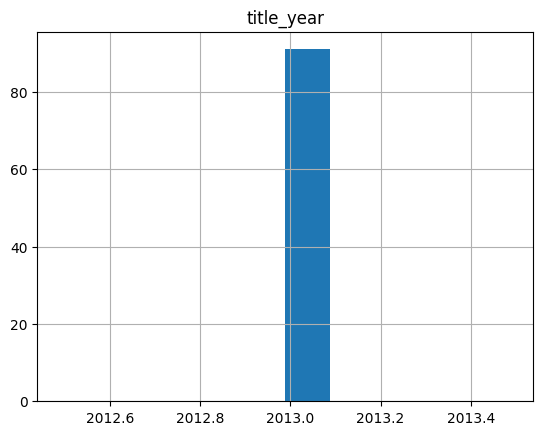

In [ ]:
imdb4.hist('title_year')

array([[<Axes: title={'center': 'imdb_score'}>]], dtype=object)

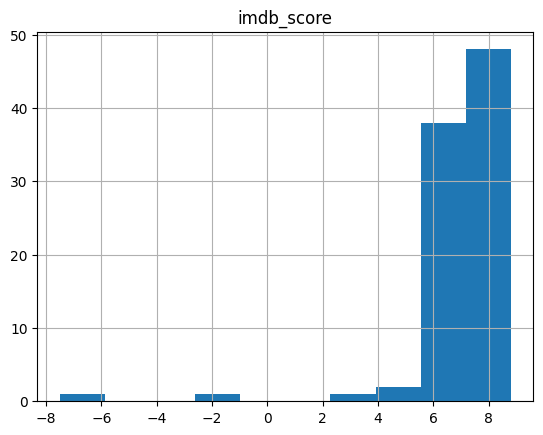

In [ ]:
imdb4.hist('imdb_score')

In [ ]:
mediana_score = imdb4[(imdb4['imdb_score']>0)]['imdb_score'].median()

In [ ]:
imdb4['imdb_score']>0

0     True
1     True
2     True
3     True
4     True
      ... 
92    True
93    True
94    True
95    True
96    True
Name: imdb_score, Length: 91, dtype: bool

In [ ]:
imdb4['imdb_score'].median()

7.2

In [ ]:
imdb4['imdb_score'] = np.where(imdb4['imdb_score']<0, media_score, imdb4['imdb_score'])

NameError: ignored

array([[<Axes: title={'center': 'imdb_score'}>]], dtype=object)

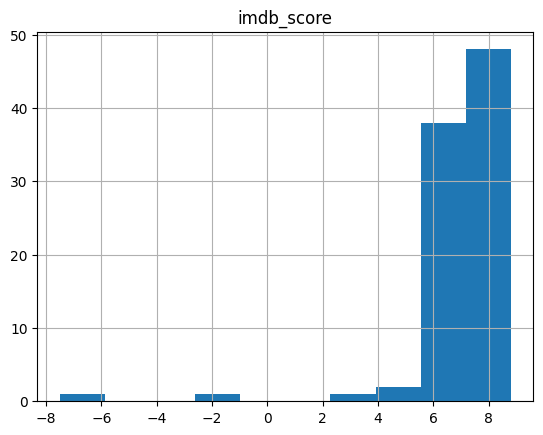

In [ ]:
imdb4.hist('imdb_score')

array([[<Axes: title={'center': 'movie_facebook_likes'}>]], dtype=object)

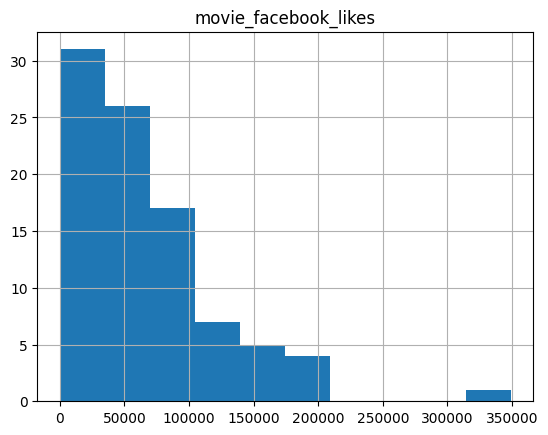

In [ ]:
imdb4.hist('movie_facebook_likes')

In [ ]:
imdb4[imdb4['movie_facebook_likes']>300000]

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
12,Christopher Nolan,169.0,187991439.0,Adventure|Drama|Sci-Fi,Interstellar,2012.988764,USA,165000000.0,8.6,"Matthew McConaughey,Anne Hathaway,Mackenzie Foy",349000


In [ ]:
#actores
imdb['actors'].value_counts()

Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    3
Aidan Turner,Adam Brown,James Nesbitt                   3
Morgan Freeman,Ayelet Zurer,Moises Arias                3
Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley        2
Albert Finney,Helen McCrory,Rory Kinnear                2
                                                       ..
Michael Emerson,Mark Valley,Grey Griffin                1
Jennifer Lawrence,Peter Dinklage,Hugh Jackman           1
Patrick Fugit,Sela Ward,Emily Ratajkowski               1
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 86, dtype: int64

In [ ]:
imdb['actors'].str.split('|')

0     [Leonardo DiCaprio,Matthew McConaughey,Jon Fav...
1           [Robert Downey Jr.,Jon Favreau,Don Cheadle]
2           [Craig Stark,Jennifer Jason Leigh,Zoë Bell]
3         [Matt Damon,Kieran Culkin,John Gallagher Jr.]
4               [Aidan Turner,Adam Brown,James Nesbitt]
                            ...                        
92       [Quvenzhané Wallis,Scoot McNairy,Taran Killam]
93                   [Mark Addy,Atom Egoyan,Paul Gross]
94             [Tom Hanks,Chris Mulkey,Michael Chernus]
95                 [Brad Pitt,Logan Lerman,Jim Parrack]
96      [Johnny Cannizzaro,Steve Schirripa,Scott Vance]
Name: actors, Length: 97, dtype: object

In [ ]:
actors_list=imdb['actors'].str.split(',', expand=True)

In [ ]:
imdb[imdb['actors'].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes


In [ ]:
imdb['actors'].value_counts()

Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    3
Aidan Turner,Adam Brown,James Nesbitt                   3
Morgan Freeman,Ayelet Zurer,Moises Arias                3
Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley        2
Albert Finney,Helen McCrory,Rory Kinnear                2
                                                       ..
Michael Emerson,Mark Valley,Grey Griffin                1
Jennifer Lawrence,Peter Dinklage,Hugh Jackman           1
Patrick Fugit,Sela Ward,Emily Ratajkowski               1
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 86, dtype: int64

In [ ]:
actors_list

,0,1,2
0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...
92,Quvenzhané Wallis,Scoot McNairy,Taran Killam
93,Mark Addy,Atom Egoyan,Paul Gross
94,Tom Hanks,Chris Mulkey,Michael Chernus
95,Brad Pitt,Logan Lerman,Jim Parrack


In [ ]:
#quiero ver el pais que mas se repite
imdb4['country'].mode()

0    USA
Name: country, dtype: object

In [ ]:
#cuantas veces esta USA
len(imdb4[(imdb4['country']=='USA')])

72

In [ ]:
#como separar los generos en datos separados
#esto lo tengo que convertirlo en Dataframe con expand=True
imdb4['genres'].str.split('|')

0              [Biography, Comedy, Crime, Drama]
1                    [Action, Adventure, Sci-Fi]
2     [Crime, Drama, Mystery, Thriller, Western]
3                                        [Drama]
4                           [Adventure, Fantasy]
                         ...                    
92                   [Biography, Drama, History]
93                               [Comedy, Drama]
94                  [Biography, Drama, Thriller]
95                          [Action, Drama, War]
96            [Biography, Drama, Music, Musical]
Name: genres, Length: 91, dtype: object

In [ ]:
#esto lo tengo que convertirlo en Dataframe con expand=True
generos_list=imdb4['genres'].str.split('|', expand=True)

In [ ]:
generos_list.fillna('SIN GENERO', inplace=True)

In [ ]:
generos_list

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,SIN GENERO
1,Action,Adventure,Sci-Fi,SIN GENERO,SIN GENERO
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,SIN GENERO,SIN GENERO,SIN GENERO,SIN GENERO
4,Adventure,Fantasy,SIN GENERO,SIN GENERO,SIN GENERO
...,...,...,...,...,...
92,Biography,Drama,History,SIN GENERO,SIN GENERO
93,Comedy,Drama,SIN GENERO,SIN GENERO,SIN GENERO
94,Biography,Drama,Thriller,SIN GENERO,SIN GENERO
95,Action,Drama,War,SIN GENERO,SIN GENERO


In [ ]:
#pegamos con join o for
for i in generos_list:
  print(i)

0
1
2
3
4


In [ ]:
for i in generos_list:
  imdb4['genero_'+i] = generos_list[i]

TypeError: ignored

In [ ]:
#hay que convertir a str porque da error al tener int.
for i in generos_list:
  imdb4['genero_'+str(i)] = generos_list[i]

In [ ]:
imdb4.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes,genero_0,genero_1,genero_2,genero_3,genero_4
0,Martin Scorsese,148.27907,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2012.988764,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,SIN GENERO
1,Shane Black,195.00000,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2012.988764,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,SIN GENERO,SIN GENERO
2,Quentin Tarantino,187.00000,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2012.988764,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Kenneth Lonergan,186.00000,46495.0,Drama,Margaret,2012.988764,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,SIN GENERO,SIN GENERO,SIN GENERO,SIN GENERO
4,Peter Jackson,186.00000,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2012.988764,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,SIN GENERO,SIN GENERO,SIN GENERO


In [ ]:
#hay que borrar la columna del genero agrupado, el que nos salia al principio.
del(imdb4['genres'])

In [ ]:
imdb4.head()

,director_name,duration,gross,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes,genero_0,genero_1,genero_2,genero_3,genero_4
0,Martin Scorsese,148.27907,116866727.0,The Wolf of Wall Street,2012.988764,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,SIN GENERO
1,Shane Black,195.00000,408992272.0,Iron Man 3,2012.988764,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,SIN GENERO,SIN GENERO
2,Quentin Tarantino,187.00000,54116191.0,The Hateful Eight,2012.988764,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Kenneth Lonergan,186.00000,46495.0,Margaret,2012.988764,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,SIN GENERO,SIN GENERO,SIN GENERO,SIN GENERO
4,Peter Jackson,186.00000,258355354.0,The Hobbit: The Desolation of Smaug,2012.988764,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,SIN GENERO,SIN GENERO,SIN GENERO


In [ ]:
imdb4.shape[1]

15

In [ ]:
imdb4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 96
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         91 non-null     object 
 1   duration              91 non-null     float64
 2   gross                 91 non-null     float64
 3   movie_title           91 non-null     object 
 4   title_year            91 non-null     float64
 5   country               91 non-null     object 
 6   budget                91 non-null     object 
 7   imdb_score            91 non-null     float64
 8   actors                91 non-null     object 
 9   movie_facebook_likes  91 non-null     int64  
 10  genero_0              91 non-null     object 
 11  genero_1              91 non-null     object 
 12  genero_2              91 non-null     object 
 13  genero_3              91 non-null     object 
 14  genero_4              91 non-null     object 
dtypes: float64(4), int64(1), 